## 야후 파이낸스로 주식시세 구하기
  ### 야후 파이낸스에서 제공하는 삼성전자와 마이크로소프트 주식 시세를 데이터프레임으로 받아 분석
   * 야후 파이낸스는 pip install yfinance로 설치
   * 팬더스-데이터리더 라이브러리 pip installpandas-datareader로 설치
   * 주식 시세를 구하기 위해서는 get_data_yahoo() 함수 사용
    - get_data_yahoo(조회할 주식,start=조회기간시작일, end=조회기간의 종료일)
    - 조회할 주식은 문자열이나, 리스트
    - 조회 기간은 생략할 수 있다.
    - 코스피종목을 조회하려면 6자리 종목코드 뒤에 .KS  
    - 코스닥종목을 조회하려면 종목코드 뒤에 .KQ
    - 미국기업 주식종목을 조회하려면 심볼(티커)를 사용하여 조회한다. 

In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt

In [2]:
sec = pdr.get_data_yahoo('005930.KS',start='2019-01-01')  # 삼성주식
msft = pdr.get_data_yahoo('MSFT',start='2019-01-01') # 마이크로 소프트 주식

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
sec.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,39400.0,39400.0,38550.0,38750.0,38750.0,7847664
2019-01-03,38300.0,38550.0,37450.0,37600.0,37600.0,12471493
2019-01-04,37450.0,37600.0,36850.0,37450.0,37450.0,14108958
2019-01-07,38000.0,38900.0,37800.0,38750.0,38750.0,12748997
2019-01-08,38000.0,39200.0,37950.0,38100.0,38100.0,12756554


In [4]:
msft.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,101.290001,102.400002,100.440002,101.570000,99.300156,33173800
2019-01-02,99.550003,101.750000,98.940002,101.120003,98.860214,35329300
2019-01-03,100.099998,100.190002,97.199997,97.400002,95.223351,42579100
2019-01-04,99.720001,102.510002,98.930000,101.930000,99.652115,44060600
2019-01-07,101.639999,103.269997,100.980003,102.059998,99.779205,35656100


##### 변수설명
* Open : 시가. 매일 열리는 주식 시장의 첫 시작 가격
* High : 고가. 가장 높은 금액으로 거래
* Low : 저가. 가장 낮은 금액으로 거래
* Close : 종가. 하루 열린 장에서 가장 마지막으로 거래가 완료된 가격을 종가
* Adj Close : 수정종가. 주식가격에 변동이 있을 경우 가격 변동 이전에 거래된 가격을 현재 주식에 맞춰 수정하여 표시한 가격
* Volume : 거래량. 매매된 주식의 수량

In [5]:
sec.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2020-09-16', '2020-09-17', '2020-09-18', '2020-09-21',
               '2020-09-22', '2020-09-23', '2020-09-24', '2020-09-25',
               '2020-09-28', '2020-09-29'],
              dtype='datetime64[ns]', name='Date', length=432, freq=None)

In [6]:
msft.index

DatetimeIndex(['2018-12-31', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2020-09-18', '2020-09-21', '2020-09-22', '2020-09-23',
               '2020-09-24', '2020-09-25', '2020-09-28', '2020-09-29',
               '2020-09-30', '2020-10-01'],
              dtype='datetime64[ns]', name='Date', length=443, freq=None)

* 삼성전자(sec)와 마이크로소프트(msft)는 인덱스가 dataime형으로 되어 있다. 

In [7]:
sec.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

### 삼성전자와 마이크로소프트 종가 데이터를 이용한 그래프 

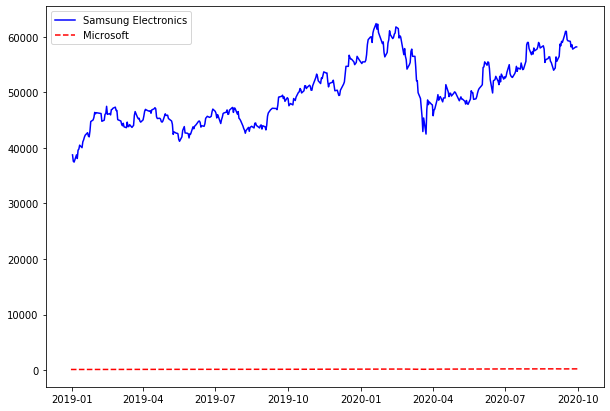

In [8]:
plt.figure(figsize=(10,7))
plt.plot(sec.index,sec['Close'],'b',label='Samsung Electronics')
plt.plot(msft.index,msft.Close,'r--',label='Microsoft')
plt.legend(loc='best')
plt.show()

##### 그래프설명
 - 삼성전자는 50000원 대 , 마이크로소프트는 130달러 대의 주가이기 때문에 숫자 차이가 커서 마이크로소프트 주가가 0인것 처럼 보인다.
 - 비교가 어렵기 때문에 일간변동률을 이용해 비교해 본다.
<br/>
<br/>


##### 코드 설명
* x 축에는 인덱스(날짜), y축에는 Close(종가)데이터.
* plt.legend(loc='best')   ->  라벨 표가 적당히 빈 자리에 위치

### 일간변동률로 삼성전자와 마이크로소프트 주가 비교하기

일간 변동률 = (오늘종가-어제종가)/어제종가 *100

In [9]:
sec['Close']

Date
2019-01-02    38750.0
2019-01-03    37600.0
2019-01-04    37450.0
2019-01-07    38750.0
2019-01-08    38100.0
               ...   
2020-09-23    58600.0
2020-09-24    57800.0
2020-09-25    57900.0
2020-09-28    58200.0
2020-09-29    58200.0
Name: Close, Length: 432, dtype: float64

In [10]:
sec['Close'].shift(1)

Date
2019-01-02        NaN
2019-01-03    38750.0
2019-01-04    37600.0
2019-01-07    37450.0
2019-01-08    38750.0
               ...   
2020-09-23    58200.0
2020-09-24    58600.0
2020-09-25    57800.0
2020-09-28    57900.0
2020-09-29    58200.0
Name: Close, Length: 432, dtype: float64

* shift는 데이터를 이동시킬 떄 사용하는 함수이다.  
* shift(?)  ->  ?만큼 이동시킨다. 
* 한 칸씩 밀려서 1월2일자 주식정보가 1월3일로 들어가 있다. 그 말은 1월 3일 입장에서는 어제 날짜의 주식정보가 들어가 있는 것이다.
* 즉, shift를 이용해서 해당날짜의 어제 주식정보를 들어가게 입력해 주었다. 

#### 일간변동률 코드

In [11]:
sec_dpc = (sec['Close']-sec['Close'].shift(1))/sec['Close'].shift(1)*100   # 삼성

In [22]:
msft_dpc = (msft['Close']-msft['Close'].shift(1))/msft['Close'].shift(1)*100  # 마이크로소프트

In [12]:
sec_dpc

Date
2019-01-02         NaN
2019-01-03   -2.967742
2019-01-04   -0.398936
2019-01-07    3.471295
2019-01-08   -1.677419
                ...   
2020-09-23    0.687285
2020-09-24   -1.365188
2020-09-25    0.173010
2020-09-28    0.518135
2020-09-29    0.000000
Name: Close, Length: 432, dtype: float64

###### NaN값을 0으로 바꾼다.

In [16]:
sec_dpc.iloc[0] = 0 
sec_dpc

Date
2019-01-02    0.000000
2019-01-03   -2.967742
2019-01-04   -0.398936
2019-01-07    3.471295
2019-01-08   -1.677419
                ...   
2020-09-23    0.687285
2020-09-24   -1.365188
2020-09-25    0.173010
2020-09-28    0.518135
2020-09-29    0.000000
Name: Close, Length: 432, dtype: float64

In [24]:
msft_dpc.iloc[0] = 0 
msft_dpc

Date
2018-12-31    0.000000
2019-01-02   -0.443041
2019-01-03   -3.678799
2019-01-04    4.650923
2019-01-07    0.127536
                ...   
2020-09-25    2.278658
2020-09-28    0.779518
2020-09-29   -1.040875
2020-09-30    1.481235
2020-10-01    0.969901
Name: Close, Length: 443, dtype: float64

###### 그래프그리기

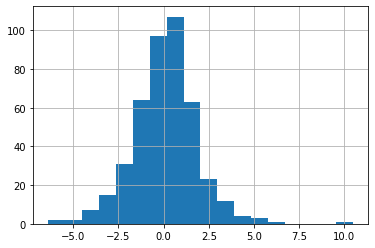

In [20]:
plt.hist(sec_dpc,bins=18)
plt.grid(True)
plt.show()

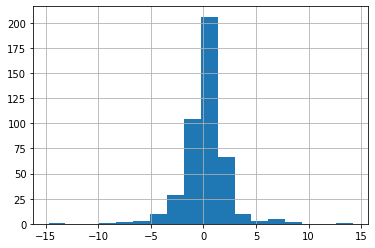

In [25]:
plt.hist(msft_dpc,bins=18)
plt.grid(True)
plt.show()

#### 일간변동률 누적합 
* sec_dpc와 msft_dpc 는 일간변동률이다. 하지만 전체적인 변동룰의 비교해보려면 일간변동률의 누적합이 필요하다. 
* cumsum() 함수를 이용해 누적합을 구한다.

In [27]:
sec_dpc_sum = sec_dpc.cumsum()
msft_dpc_sum = msft_dpc.cumsum()

In [28]:
sec_dpc_sum

Date
2019-01-02     0.000000
2019-01-03    -2.967742
2019-01-04    -3.366678
2019-01-07     0.104617
2019-01-08    -1.572802
                ...    
2020-09-23    48.430333
2020-09-24    47.065145
2020-09-25    47.238155
2020-09-28    47.756290
2020-09-29    47.756290
Name: Close, Length: 432, dtype: float64

In [29]:
msft_dpc_sum

Date
2018-12-31     0.000000
2019-01-02    -0.443041
2019-01-03    -4.121840
2019-01-04     0.529083
2019-01-07     0.656619
                ...    
2020-09-25    82.394228
2020-09-28    83.173746
2020-09-29    82.132871
2020-09-30    83.614106
2020-10-01    84.584007
Name: Close, Length: 443, dtype: float64

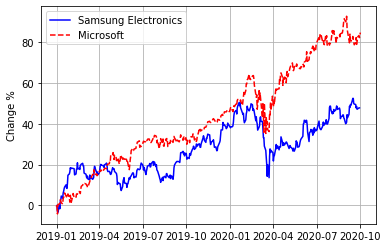

In [32]:
plt.plot(sec.index,sec_dpc_sum,'b',label='Samsung Electronics')
plt.plot(msft.index,msft_dpc_sum,'r--',label='Microsoft')
plt.ylabel('Change %')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [19]:
result=cursor.fetchone()

In [20]:
print("mariaDB version : {}".format(result))

mariaDB version : ('10.5.5-MariaDB',)


In [21]:
connection.close()

In [22]:
## p.227 종목코드 구하기

In [23]:
import pandas as pd

In [25]:
class DBUpdater:
    def read_krx_code(self):
        #url = "http://kind.krx.co.kr/corpgeneral/corpList.do?method="\"download&searchType=13"
        #krx=pd.read_html(url,header=0)[0]
        #krx= pd.read_excel('상장법인목록.xlsx')
        krx = krx[['종목코드','회사명']]
        krx = krx.rename(columns={'종목코드':'code','회사명':'company'})
        krx.code = krx.code.map('{06d}'.format)
        return krx

In [28]:
import pandas as pd
from bs4 import BeautifulSoup
import urllib, pymysql, calendar, time, json
from urllib.request import urlopen
from datetime import datetime
from threading import Timer

class DBUpdater:  
    def __init__(self):
        """생성자: MariaDB 연결 및 종목코드 딕셔너리 생성"""
        self.conn = pymysql.connect(host='localhost', user='root',
            password='0484', db='investor', charset='utf8')
        
        with self.conn.cursor() as curs:
            sql = """
            CREATE TABLE IF NOT EXISTS company_info (
                code VARCHAR(20),
                company VARCHAR(40),
                last_update DATE,
                PRIMARY KEY (code))
            """
            curs.execute(sql)
            sql = """
            CREATE TABLE IF NOT EXISTS daily_price (
                code VARCHAR(20),
                date DATE,
                open BIGINT(20),
                high BIGINT(20),
                low BIGINT(20),
                close BIGINT(20),
                diff BIGINT(20),
                volume BIGINT(20),
                PRIMARY KEY (code, date))
            """
            curs.execute(sql)
        self.conn.commit()
        self.codes = dict()
               
    def __del__(self):
        """소멸자: MariaDB 연결 해제"""
        self.conn.close() 
     
    def read_krx_code(self):
        """KRX로부터 상장기업 목록 파일을 읽어와서 데이터프레임으로 반환"""
        url = 'http://kind.krx.co.kr/corpgeneral/corpList.do?method='\
            'download&searchType=13'
        krx = pd.read_html(url, header=0)[0]
        krx = krx[['종목코드', '회사명']]
        krx = krx.rename(columns={'종목코드': 'code', '회사명': 'company'})
        krx.code = krx.code.map('{:06d}'.format)
        return krx
    
    def update_comp_info(self):
        """종목코드를 company_info 테이블에 업데이트 한 후 딕셔너리에 저장"""
        sql = "SELECT * FROM company_info"
        df = pd.read_sql(sql, self.conn)
        for idx in range(len(df)):
            self.codes[df['code'].values[idx]] = df['company'].values[idx]
                    
        with self.conn.cursor() as curs:
            sql = "SELECT max(last_update) FROM company_info"
            curs.execute(sql)
            rs = curs.fetchone()
            today = datetime.today().strftime('%Y-%m-%d')
            if rs[0] == None or rs[0].strftime('%Y-%m-%d') < today:
                krx = self.read_krx_code()
                for idx in range(len(krx)):
                    code = krx.code.values[idx]
                    company = krx.company.values[idx]                
                    sql = f"REPLACE INTO company_info (code, company, last"\
                        f"_update) VALUES ('{code}', '{company}', '{today}')"
                    curs.execute(sql)
                    self.codes[code] = company
                    tmnow = datetime.now().strftime('%Y-%m-%d %H:%M')
                    print(f"[{tmnow}] #{idx+1:04d} REPLACE INTO company_info "\
                        f"VALUES ({code}, {company}, {today})")
                self.conn.commit()
                print('')              

    def read_naver(self, code, company, pages_to_fetch):
        """네이버에서 주식 시세를 읽어서 데이터프레임으로 반환"""
        try:
            url = f"http://finance.naver.com/item/sise_day.nhn?code={code}"
            with urlopen(url) as doc:
                if doc is None:
                    return None
                html = BeautifulSoup(doc, "lxml")
                pgrr = html.find("td", class_="pgRR")
                if pgrr is None:
                    return None
                s = str(pgrr.a["href"]).split('=')
                lastpage = s[-1] 
            df = pd.DataFrame()
            pages = min(int(lastpage), pages_to_fetch)
            for page in range(1, pages + 1):
                pg_url = '{}&page={}'.format(url, page)
                df = df.append(pd.read_html(pg_url, header=0)[0])
                tmnow = datetime.now().strftime('%Y-%m-%d %H:%M')
                print('[{}] {} ({}) : {:04d}/{:04d} pages are downloading...'.
                    format(tmnow, company, code, page, pages), end="\r")
            df = df.rename(columns={'날짜':'date','종가':'close','전일비':'diff'
                ,'시가':'open','고가':'high','저가':'low','거래량':'volume'})
            df['date'] = df['date'].replace('.', '-')
            df = df.dropna()
            df[['close', 'diff', 'open', 'high', 'low', 'volume']] = df[['close',
                'diff', 'open', 'high', 'low', 'volume']].astype(int)
            df = df[['date', 'open', 'high', 'low', 'close', 'diff', 'volume']]
        except Exception as e:
            print('Exception occured :', str(e))
            return None
        return df

    def replace_into_db(self, df, num, code, company):
        """네이버에서 읽어온 주식 시세를 DB에 REPLACE"""
        with self.conn.cursor() as curs:
            for r in df.itertuples():
                sql = f"REPLACE INTO daily_price VALUES ('{code}', "\
                    f"'{r.date}', {r.open}, {r.high}, {r.low}, {r.close}, "\
                    f"{r.diff}, {r.volume})"
                curs.execute(sql)
            self.conn.commit()
            print('[{}] #{:04d} {} ({}) : {} rows > REPLACE INTO daily_'\
                'price [OK]'.format(datetime.now().strftime('%Y-%m-%d'\
                ' %H:%M'), num+1, company, code, len(df)))

    def update_daily_price(self, pages_to_fetch):
        """KRX 상장법인의 주식 시세를 네이버로부터 읽어서 DB에 업데이트"""  
        for idx, code in enumerate(self.codes):
            df = self.read_naver(code, self.codes[code], pages_to_fetch)
            if df is None:
                continue
            self.replace_into_db(df, idx, code, self.codes[code])            

    def execute_daily(self):
        """실행 즉시 및 매일 오후 다섯시에 daily_price 테이블 업데이트"""
        self.update_comp_info()
        
        try:
            with open('config.json', 'r') as in_file:
                config = json.load(in_file)
                pages_to_fetch = config['pages_to_fetch']
        except FileNotFoundError:
            with open('config.json', 'w') as out_file:
                pages_to_fetch = 100 
                config = {'pages_to_fetch': 1}
                json.dump(config, out_file)
        self.update_daily_price(pages_to_fetch)

        tmnow = datetime.now()
        lastday = calendar.monthrange(tmnow.year, tmnow.month)[1]
        if tmnow.month == 12 and tmnow.day == lastday:
            tmnext = tmnow.replace(year=tmnow.year+1, month=1, day=1,
                hour=17, minute=0, second=0)
        elif tmnow.day == lastday:
            tmnext = tmnow.replace(month=tmnow.month+1, day=1, hour=17,
                minute=0, second=0)
        else:
            tmnext = tmnow.replace(day=tmnow.day+1, hour=17, minute=0,
                second=0)   
        tmdiff = tmnext - tmnow
        secs = tmdiff.seconds
        t = Timer(secs, self.execute_daily)
        print("Waiting for next update ({}) ... ".format(tmnext.strftime
            ('%Y-%m-%d %H:%M')))
        t.start()

if __name__ == '__main__':
    dbu = DBUpdater()
    dbu.execute_daily()

[2020-09-27 17:12] #0001 REPLACE INTO company_info VALUES (155660, DSR, 2020-09-27)
[2020-09-27 17:12] #0002 REPLACE INTO company_info VALUES (001250, GS글로벌, 2020-09-27)
[2020-09-27 17:12] #0003 REPLACE INTO company_info VALUES (294870, HDC현대산업개발, 2020-09-27)
[2020-09-27 17:12] #0004 REPLACE INTO company_info VALUES (011070, LG이노텍, 2020-09-27)
[2020-09-27 17:12] #0005 REPLACE INTO company_info VALUES (066570, LG전자, 2020-09-27)
[2020-09-27 17:12] #0006 REPLACE INTO company_info VALUES (037560, LG헬로비전, 2020-09-27)
[2020-09-27 17:12] #0007 REPLACE INTO company_info VALUES (010060, OCI, 2020-09-27)
[2020-09-27 17:12] #0008 REPLACE INTO company_info VALUES (100840, S&TC, 2020-09-27)
[2020-09-27 17:12] #0009 REPLACE INTO company_info VALUES (064960, S&T모티브, 2020-09-27)
[2020-09-27 17:12] #0010 REPLACE INTO company_info VALUES (096770, SK이노베이션, 2020-09-27)
[2020-09-27 17:12] #0011 REPLACE INTO company_info VALUES (011810, STX, 2020-09-27)
[2020-09-27 17:12] #0012 REPLACE INTO company_info VAL

[2020-09-27 17:12] #0475 REPLACE INTO company_info VALUES (036000, 예림당, 2020-09-27)
[2020-09-27 17:12] #0476 REPLACE INTO company_info VALUES (046120, 오르비텍, 2020-09-27)
[2020-09-27 17:12] #0477 REPLACE INTO company_info VALUES (052420, 오성첨단소재, 2020-09-27)
[2020-09-27 17:12] #0478 REPLACE INTO company_info VALUES (241790, 오션브릿지, 2020-09-27)
[2020-09-27 17:12] #0479 REPLACE INTO company_info VALUES (073560, 우리손에프앤지, 2020-09-27)
[2020-09-27 17:12] #0480 REPLACE INTO company_info VALUES (066590, 우수AMS, 2020-09-27)
[2020-09-27 17:12] #0481 REPLACE INTO company_info VALUES (012620, 원일특강, 2020-09-27)
[2020-09-27 17:12] #0482 REPLACE INTO company_info VALUES (192390, 윈하이텍, 2020-09-27)
[2020-09-27 17:12] #0483 REPLACE INTO company_info VALUES (313760, 윌링스, 2020-09-27)
[2020-09-27 17:12] #0484 REPLACE INTO company_info VALUES (206650, 유바이오로직스, 2020-09-27)
[2020-09-27 17:12] #0485 REPLACE INTO company_info VALUES (340360, 유안타제6호스팩, 2020-09-27)
[2020-09-27 17:12] #0486 REPLACE INTO company_info VA

[2020-09-27 17:12] #0841 REPLACE INTO company_info VALUES (317530, 캐리소프트, 2020-09-27)
[2020-09-27 17:12] #0842 REPLACE INTO company_info VALUES (180400, 캔서롭, 2020-09-27)
[2020-09-27 17:12] #0843 REPLACE INTO company_info VALUES (050110, 캠시스, 2020-09-27)
[2020-09-27 17:12] #0844 REPLACE INTO company_info VALUES (323940, 케이비제18호스팩, 2020-09-27)
[2020-09-27 17:12] #0845 REPLACE INTO company_info VALUES (032500, 케이엠더블유, 2020-09-27)
[2020-09-27 17:12] #0846 REPLACE INTO company_info VALUES (024880, 케이피에프, 2020-09-27)
[2020-09-27 17:12] #0847 REPLACE INTO company_info VALUES (052400, 코나아이, 2020-09-27)
[2020-09-27 17:12] #0848 REPLACE INTO company_info VALUES (094860, 코닉글로리, 2020-09-27)
[2020-09-27 17:12] #0849 REPLACE INTO company_info VALUES (078940, 코드네이처, 2020-09-27)
[2020-09-27 17:12] #0850 REPLACE INTO company_info VALUES (190650, 코리아에셋투자증권, 2020-09-27)
[2020-09-27 17:12] #0851 REPLACE INTO company_info VALUES (183300, 코미코, 2020-09-27)
[2020-09-27 17:12] #0852 REPLACE INTO company_info V

[2020-09-27 17:12] #1235 REPLACE INTO company_info VALUES (900140, 엘브이엠씨, 2020-09-27)
[2020-09-27 17:12] #1236 REPLACE INTO company_info VALUES (010120, 엘에스일렉트릭, 2020-09-27)
[2020-09-27 17:12] #1237 REPLACE INTO company_info VALUES (271560, 오리온, 2020-09-27)
[2020-09-27 17:12] #1238 REPLACE INTO company_info VALUES (316140, 우리금융지주, 2020-09-27)
[2020-09-27 17:12] #1239 REPLACE INTO company_info VALUES (006980, 우성사료, 2020-09-27)
[2020-09-27 17:12] #1240 REPLACE INTO company_info VALUES (010600, 웰바이오텍, 2020-09-27)
[2020-09-27 17:12] #1241 REPLACE INTO company_info VALUES (000910, 유니온, 2020-09-27)
[2020-09-27 17:12] #1242 REPLACE INTO company_info VALUES (003470, 유안타증권, 2020-09-27)
[2020-09-27 17:12] #1243 REPLACE INTO company_info VALUES (103590, 일진전기, 2020-09-27)
[2020-09-27 17:12] #1244 REPLACE INTO company_info VALUES (004700, 조광피혁, 2020-09-27)
[2020-09-27 17:12] #1245 REPLACE INTO company_info VALUES (018470, 조일알미늄, 2020-09-27)
[2020-09-27 17:12] #1246 REPLACE INTO company_info VALUES 

[2020-09-27 17:12] #1585 REPLACE INTO company_info VALUES (186230, 그린플러스, 2020-09-27)
[2020-09-27 17:12] #1586 REPLACE INTO company_info VALUES (035460, 기산텔레콤, 2020-09-27)
[2020-09-27 17:12] #1587 REPLACE INTO company_info VALUES (242040, 나무기술, 2020-09-27)
[2020-09-27 17:12] #1588 REPLACE INTO company_info VALUES (130580, 나이스디앤비, 2020-09-27)
[2020-09-27 17:12] #1589 REPLACE INTO company_info VALUES (033640, 네패스, 2020-09-27)
[2020-09-27 17:12] #1590 REPLACE INTO company_info VALUES (020400, 대동금속, 2020-09-27)
[2020-09-27 17:12] #1591 REPLACE INTO company_info VALUES (017650, 대림제지, 2020-09-27)
[2020-09-27 17:12] #1592 REPLACE INTO company_info VALUES (020180, 대신정보통신, 2020-09-27)
[2020-09-27 17:12] #1593 REPLACE INTO company_info VALUES (035290, 더블유에프엠, 2020-09-27)
[2020-09-27 17:12] #1594 REPLACE INTO company_info VALUES (075970, 동국알앤에스, 2020-09-27)
[2020-09-27 17:12] #1595 REPLACE INTO company_info VALUES (088910, 동우팜투테이블, 2020-09-27)
[2020-09-27 17:12] #1596 REPLACE INTO company_info VA

[2020-09-27 17:12] #1707 REPLACE INTO company_info VALUES (228760, 지노믹트리, 2020-09-27)
[2020-09-27 17:12] #1708 REPLACE INTO company_info VALUES (303030, 지니틱스, 2020-09-27)
[2020-09-27 17:12] #1709 REPLACE INTO company_info VALUES (018120, 진로발효, 2020-09-27)
[2020-09-27 17:12] #1710 REPLACE INTO company_info VALUES (066360, 체리부로, 2020-09-27)
[2020-09-27 17:12] #1711 REPLACE INTO company_info VALUES (293490, 카카오게임즈, 2020-09-27)
[2020-09-27 17:12] #1712 REPLACE INTO company_info VALUES (221980, 케이디켐, 2020-09-27)
[2020-09-27 17:12] #1713 REPLACE INTO company_info VALUES (256940, 케이피에스, 2020-09-27)
[2020-09-27 17:12] #1714 REPLACE INTO company_info VALUES (080530, 코디, 2020-09-27)
[2020-09-27 17:12] #1715 REPLACE INTO company_info VALUES (224060, 코디엠, 2020-09-27)
[2020-09-27 17:12] #1716 REPLACE INTO company_info VALUES (101670, 코리아에스이, 2020-09-27)
[2020-09-27 17:12] #1717 REPLACE INTO company_info VALUES (082660, 코스나인, 2020-09-27)
[2020-09-27 17:12] #1718 REPLACE INTO company_info VALUES (069

[2020-09-27 17:12] #2230 REPLACE INTO company_info VALUES (189860, 서전기전, 2020-09-27)
[2020-09-27 17:12] #2231 REPLACE INTO company_info VALUES (035890, 서희건설, 2020-09-27)
[2020-09-27 17:12] #2232 REPLACE INTO company_info VALUES (014620, 성광벤드, 2020-09-27)
[2020-09-27 17:12] #2233 REPLACE INTO company_info VALUES (039310, 세중, 2020-09-27)
[2020-09-27 17:12] #2234 REPLACE INTO company_info VALUES (051980, 센트럴바이오, 2020-09-27)
[2020-09-27 17:12] #2235 REPLACE INTO company_info VALUES (091990, 셀트리온헬스케어, 2020-09-27)
[2020-09-27 17:12] #2236 REPLACE INTO company_info VALUES (036830, 솔브레인홀딩스, 2020-09-27)
[2020-09-27 17:12] #2237 REPLACE INTO company_info VALUES (304100, 솔트룩스, 2020-09-27)
[2020-09-27 17:12] #2238 REPLACE INTO company_info VALUES (317770, 슈프리마아이디, 2020-09-27)
[2020-09-27 17:12] #2239 REPLACE INTO company_info VALUES (048870, 시너지이노베이션, 2020-09-27)
[2020-09-27 17:12] #2240 REPLACE INTO company_info VALUES (002800, 신신제약, 2020-09-27)
[2020-09-27 17:12] #2241 REPLACE INTO company_info 

[2020-09-27 17:12] #0001 DSR (155660) : 1000 rows > REPLACE INTO daily_price [OK]
[2020-09-27 17:12] #0002 GS글로벌 (001250) : 1000 rows > REPLACE INTO daily_price [OK]


Exception ignored in: <function DBUpdater.__del__ at 0x000001DAFCD07168>
Traceback (most recent call last):
  File "<ipython-input-26-f08c1a269c71>", line 41, in __del__
AttributeError: 'DBUpdater' object has no attribute 'conn'


[2020-09-27 17:12] #0003 HDC현대산업개발 (294870) : 567 rows > REPLACE INTO daily_price [OK]
[2020-09-27 17:13] #0004 LG이노텍 (011070) : 1000 rows > REPLACE INTO daily_price [OK]
[2020-09-27 17:13] #0005 LG전자 (066570) : 1000 rows > REPLACE INTO daily_price [OK]
[2020-09-27 17:13] #0006 LG헬로비전 (037560) : 1000 rows > REPLACE INTO daily_price [OK]
[2020-09-27 17:13] #0007 OCI (010060) : 1000 rows > REPLACE INTO daily_price [OK]
[2020-09-27 17:14] #0008 S&TC (100840) : 1000 rows > REPLACE INTO daily_price [OK]
[2020-09-27 17:14] #0009 S&T모티브 (064960) : 1000 rows > REPLACE INTO daily_price [OK]
[2020-09-27 17:14] #0010 SK이노베이션 (096770) : 1000 rows > REPLACE INTO daily_price [OK]
[2020-09-27 17:14] #0011 STX (011810) : 1000 rows > REPLACE INTO daily_price [OK]
[2020-09-27 17:15] #0012 WISCOM (024070) : 1000 rows > REPLACE INTO daily_price [OK]
[2020-09-27 17:15] #0013 YG PLUS (037270) : 1000 rows > REPLACE INTO daily_price [OK]
[2020-09-27 17:15] #0014 갤럭시아에스엠 (011420) : 1000 rows > REPLACE INTO dai

[2020-09-27 17:54] #0198 우리바이오 (082850) : 1000 rows > REPLACE INTO daily_price [OK]
[2020-09-27 17:55] #0199 원익QnC (074600) : 1000 rows > REPLACE INTO daily_price [OK]
[2020-09-27 17:55] #0200 원익큐브 (014190) : 1000 rows > REPLACE INTO daily_price [OK]
[2020-09-27 17:55] #0201 원풍물산 (008290) : 1000 rows > REPLACE INTO daily_price [OK]
[2020-09-27 17:55] #0202 웨이브일렉트로 (095270) : 1000 rows > REPLACE INTO daily_price [OK]
[2020-09-27 17:55] #0203 웰크론 (065950) : 1000 rows > REPLACE INTO daily_price [OK]
[2020-09-27 17:56] #0204 위지트 (036090) : 1000 rows > REPLACE INTO daily_price [OK]
[2020-09-27 17:56] #0205 유니온커뮤니티 (203450) : 1000 rows > REPLACE INTO daily_price [OK]
[2020-09-27 17:56] #0206 유니테크노 (241690) : 990 rows > REPLACE INTO daily_price [OK]
[2020-09-27 17:56] #0207 유비쿼스홀딩스 (078070) : 1000 rows > REPLACE INTO daily_price [OK]
[2020-09-27 17:57] #0208 유신 (054930) : 1000 rows > REPLACE INTO daily_price [OK]
[2020-09-27 17:57] #0209 유안타제5호스팩 (336060) : 207 rows > REPLACE INTO daily_price

[2020-09-27 18:29] #0393 노바렉스 (194700) : 463 rows > REPLACE INTO daily_price [OK]
[2020-09-27 18:29] #0394 녹원씨엔아이 (065560) : 1000 rows > REPLACE INTO daily_price [OK]
[2020-09-27 18:29] #0395 누리텔레콤 (040160) : 1000 rows > REPLACE INTO daily_price [OK]
[2020-09-27 18:30] #0396 뉴파워프라즈마 (144960) : 940 rows > REPLACE INTO daily_price [OK]
[2020-09-27 18:30] #0397 대성파인텍 (104040) : 1000 rows > REPLACE INTO daily_price [OK]
[2020-09-27 18:30] #0398 대아티아이 (045390) : 1000 rows > REPLACE INTO daily_price [OK]
[2020-09-27 18:30] #0399 대주전자재료 (078600) : 1000 rows > REPLACE INTO daily_price [OK]
[2020-09-27 18:30] #0400 대창솔루션 (096350) : 1000 rows > REPLACE INTO daily_price [OK]
[2020-09-27 18:30] #0401 덕산네오룩스 (213420) : 1000 rows > REPLACE INTO daily_price [OK]


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import pymysql
from datetime import datetime
from datetime import timedelta
import re

class MarketDB:
    def __init__(self):
        """생성자: MariaDB 연결 및 종목코드 딕셔너리 생성"""
        self.conn = pymysql.connect(host='localhost', user='root', 
            password='snake.land.', db='INVESTAR', charset='utf8')
        self.codes = {}
        self.get_comp_info()
        
    def __del__(self):
        """소멸자: MariaDB 연결 해제"""
        self.conn.close()

    def get_comp_info(self):
        """company_info 테이블에서 읽어와서 codes에 저장"""
        sql = "SELECT * FROM company_info"
        krx = pd.read_sql(sql, self.conn)
        for idx in range(len(krx)):
            self.codes[krx['code'].values[idx]] = krx['company'].values[idx]

    def get_daily_price(self, code, start_date=None, end_date=None):
        """KRX 종목의 일별 시세를 데이터프레임 형태로 반환
            - code       : KRX 종목코드('005930') 또는 상장기업명('삼성전자')
            - start_date : 조회 시작일('2020-01-01'), 미입력 시 1년 전 오늘
            - end_date   : 조회 종료일('2020-12-31'), 미입력 시 오늘 날짜
        """
        if start_date is None:
            one_year_ago = datetime.today() - timedelta(days=365)
            start_date = one_year_ago.strftime('%Y-%m-%d')
            print("start_date is initialized to '{}'".format(start_date))
        else:
            start_lst = re.split('\D+', start_date)
            if start_lst[0] == '':
                start_lst = start_lst[1:]
            start_year = int(start_lst[0])
            start_month = int(start_lst[1])
            start_day = int(start_lst[2])
            if start_year < 1900 or start_year > 2200:
                print(f"ValueError: start_year({start_year:d}) is wrong.")
                return
            if start_month < 1 or start_month > 12:
                print(f"ValueError: start_month({start_month:d}) is wrong.")
                return
            if start_day < 1 or start_day > 31:
                print(f"ValueError: start_day({start_day:d}) is wrong.")
                return
            start_date=f"{start_year:04d}-{start_month:02d}-{start_day:02d}"

        if end_date is None:
            end_date = datetime.today().strftime('%Y-%m-%d')
            print("end_date is initialized to '{}'".format(end_date))
        else:
            end_lst = re.split('\D+', end_date)
            if end_lst[0] == '':
                end_lst = end_lst[1:] 
            end_year = int(end_lst[0])
            end_month = int(end_lst[1])
            end_day = int(end_lst[2])
            if end_year < 1800 or end_year > 2200:
                print(f"ValueError: end_year({end_year:d}) is wrong.")
                return
            if end_month < 1 or end_month > 12:
                print(f"ValueError: end_month({end_month:d}) is wrong.")
                return
            if end_day < 1 or end_day > 31:
                print(f"ValueError: end_day({end_day:d}) is wrong.")
                return
            end_date = f"{end_year:04d}-{end_month:02d}-{end_day:02d}"
         
        codes_keys = list(self.codes.keys())
        codes_values = list(self.codes.values())

        if code in codes_keys:
            pass
        elif code in codes_values:
            idx = codes_values.index(code)
            code = codes_keys[idx]
        else:
            print(f"ValueError: Code({code}) doesn't exist.")
        sql = f"SELECT * FROM daily_price WHERE code = '{code}'"\
            f" and date >= '{start_date}' and date <= '{end_date}'"
        df = pd.read_sql(sql, self.conn)
        df.index = df['date']
        return df 

